# Лабораторная работа № 3. Логистическая регрессия. Часть 2. Задание 2

Библиотеки

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets

In [122]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Решаем задачу многоклассовой логистической регрессии

Делим на обучающую и тестовую части

In [123]:
train, test = train_test_split(data, test_size=0.2)

Выбираем модель и обучаем

In [124]:
real_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [125]:
model = LogisticRegression(random_state=0, max_iter=1000)

X_train = train[real_features]
Y_train = train['target']

model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [126]:
X_test = test[real_features]
Y_test = test['target']

Y_pred = model.predict(X_test)

Y_pred

array([1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       2, 2, 1, 0, 0, 1, 2, 2])

In [127]:
score = model.score(X_test, Y_test)
score

0.9666666666666667

Нарисуем график решения на плоскости petal length - petal width

In [128]:
df = pd.DataFrame(X_test)
df['target'] = Y_pred

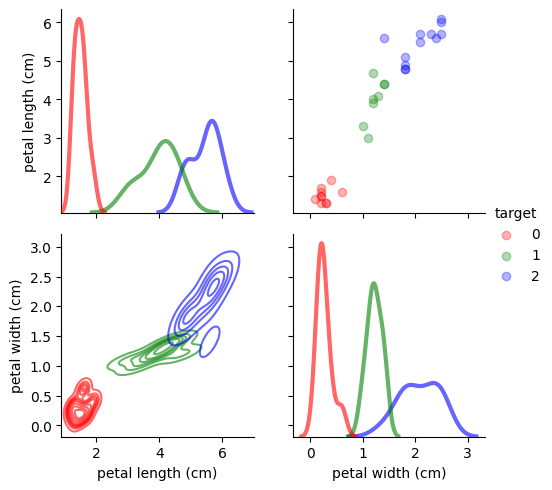

In [129]:
graph = sns.PairGrid(df[['petal length (cm)', 'petal width (cm)', 'target']], hue='target', diag_sharey=False, palette=['r', 'g', 'b'])
graph.map_lower(sns.kdeplot, alpha=0.6)
graph.map_upper(plt.scatter, alpha=0.3)
graph.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
graph.add_legend()
plt.show()

Для сравнения, исходный график

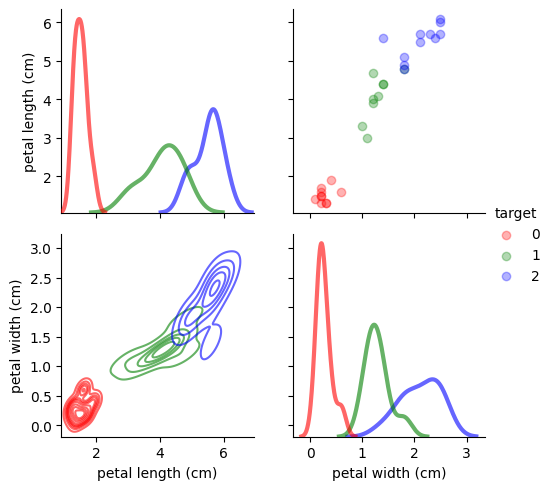

In [130]:
graph = sns.PairGrid(test[['petal length (cm)', 'petal width (cm)', 'target']], hue='target', diag_sharey=False, palette=['r', 'g', 'b'])
graph.map_lower(sns.kdeplot, alpha=0.6)
graph.map_upper(plt.scatter, alpha=0.3)
graph.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
graph.add_legend()
plt.show()